<a href="https://colab.research.google.com/github/ravi-3690/ML-WORKSHOP-PROJECTS/blob/main/CNN(Image_classification)(27nov).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
#Normalize pixel values (scale b/w 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
#Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

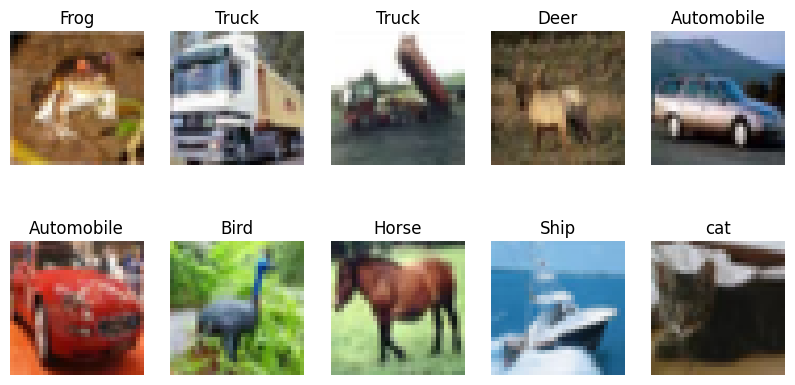

In [ ]:
#Display some sample images
class_names = ['Airplane', 'Automobile', 'Bird', 'cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [ ]:
model = models.Sequential()

#Convolutional and Pooling layer
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary() #View model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.3744 - loss: 1.6973 - val_accuracy: 0.5359 - val_loss: 1.2859
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.5537 - loss: 1.2477 - val_accuracy: 0.5847 - val_loss: 1.1660
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.6117 - loss: 1.0961 - val_accuracy: 0.6318 - val_loss: 1.0652
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.6565 - loss: 0.9739 - val_accuracy: 0.6481 - val_loss: 1.0037
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.6807 - loss: 0.9041 - val_accuracy: 0.6690 - val_loss: 0.9510
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7072 - loss: 0.8357 - val_accuracy: 0.6857 - val_loss: 0.8999
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7232 - loss: 0.7829 - val_accuracy: 0.6799 - val_loss: 0.9364
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.7379 - loss: 0.7403 - 

In [ ]:
#Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 3s - 11ms/step - accuracy: 0.7040 - loss: 0.8736
Test accuracy: 0.70


In [ ]:
#Predict the first 10 test images
predictions = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


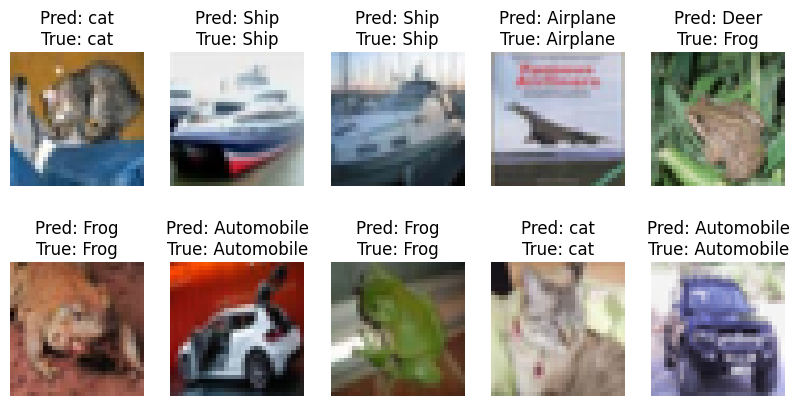

In [ ]:
#Display predictions and actual labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[np.argmax(y_test[i])]}")
    plt.axis('off')
plt.show()

In [ ]:
#Pedict own image
from tensorflow.keras.preprocessing import image

In [ ]:
#save the model (if not done already)
model.save("classify.keras")

In [ ]:
#load the save model
model = tf.keras.models.load_model("classify.keras")

In [ ]:
#Path to the image
image_path = "/content/bird.jpg"

In [ ]:
#Load and preprocess the image
img = image.load_img(image_path, target_size=(32,32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
#Predict the class of the image
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
#Map prediction to class name (e.g., CIFAR-10 class names)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
predicted_class = class_names[np.argmax(predictions[0])]

print(f"Predicted Class: {predicted_class}")

Predicted Class: Bird


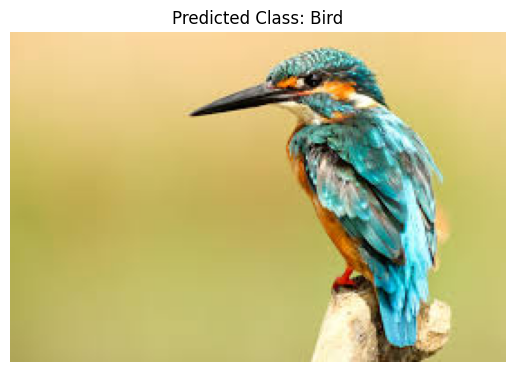

In [ ]:
#Visualize the image with the predicted model
plt.imshow(image.load_img(image_path))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()